In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [6]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Pretend we do not know the species
df.drop(columns = 'species', inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We are going to use k-means clustering to identify how many unique groups exist in this dataset (we know there are 3 species, but let's pretend we didn't know this beforehand).

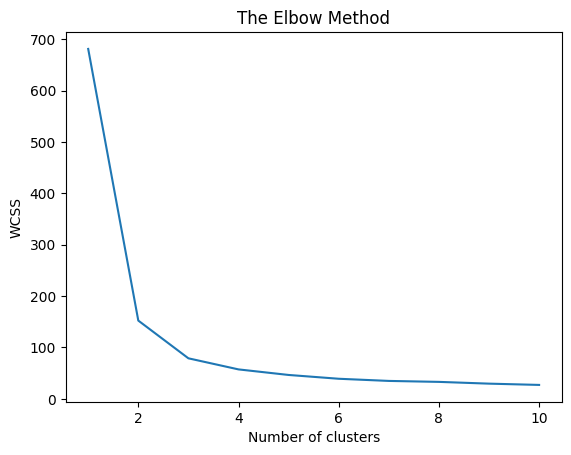

In [10]:
# Decide what K to use

wcss = []

# For each n_clusters, i, get the inertia 
for i in range(1, 11): # 1 to 10 clusters
        kmeans = KMeans(n_clusters = i, n_init = 1, random_state = 42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

# visualisation
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [17]:
df['Cluster'] = kmeans.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [18]:
# getting average attributes for each cluster
# grouping by cluster
cluster_groups = df.groupby('Cluster')

# Average attributes
cluster_groups.mean()

,sepal_length,sepal_width,petal_length,petal_width
Cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053
